In [1]:

##### notebook2-week10-KNN-Project #### 

### K Nearest Neighbors Project



In [2]:

## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/taherehehsan/KNN_Project_Data.txt')

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

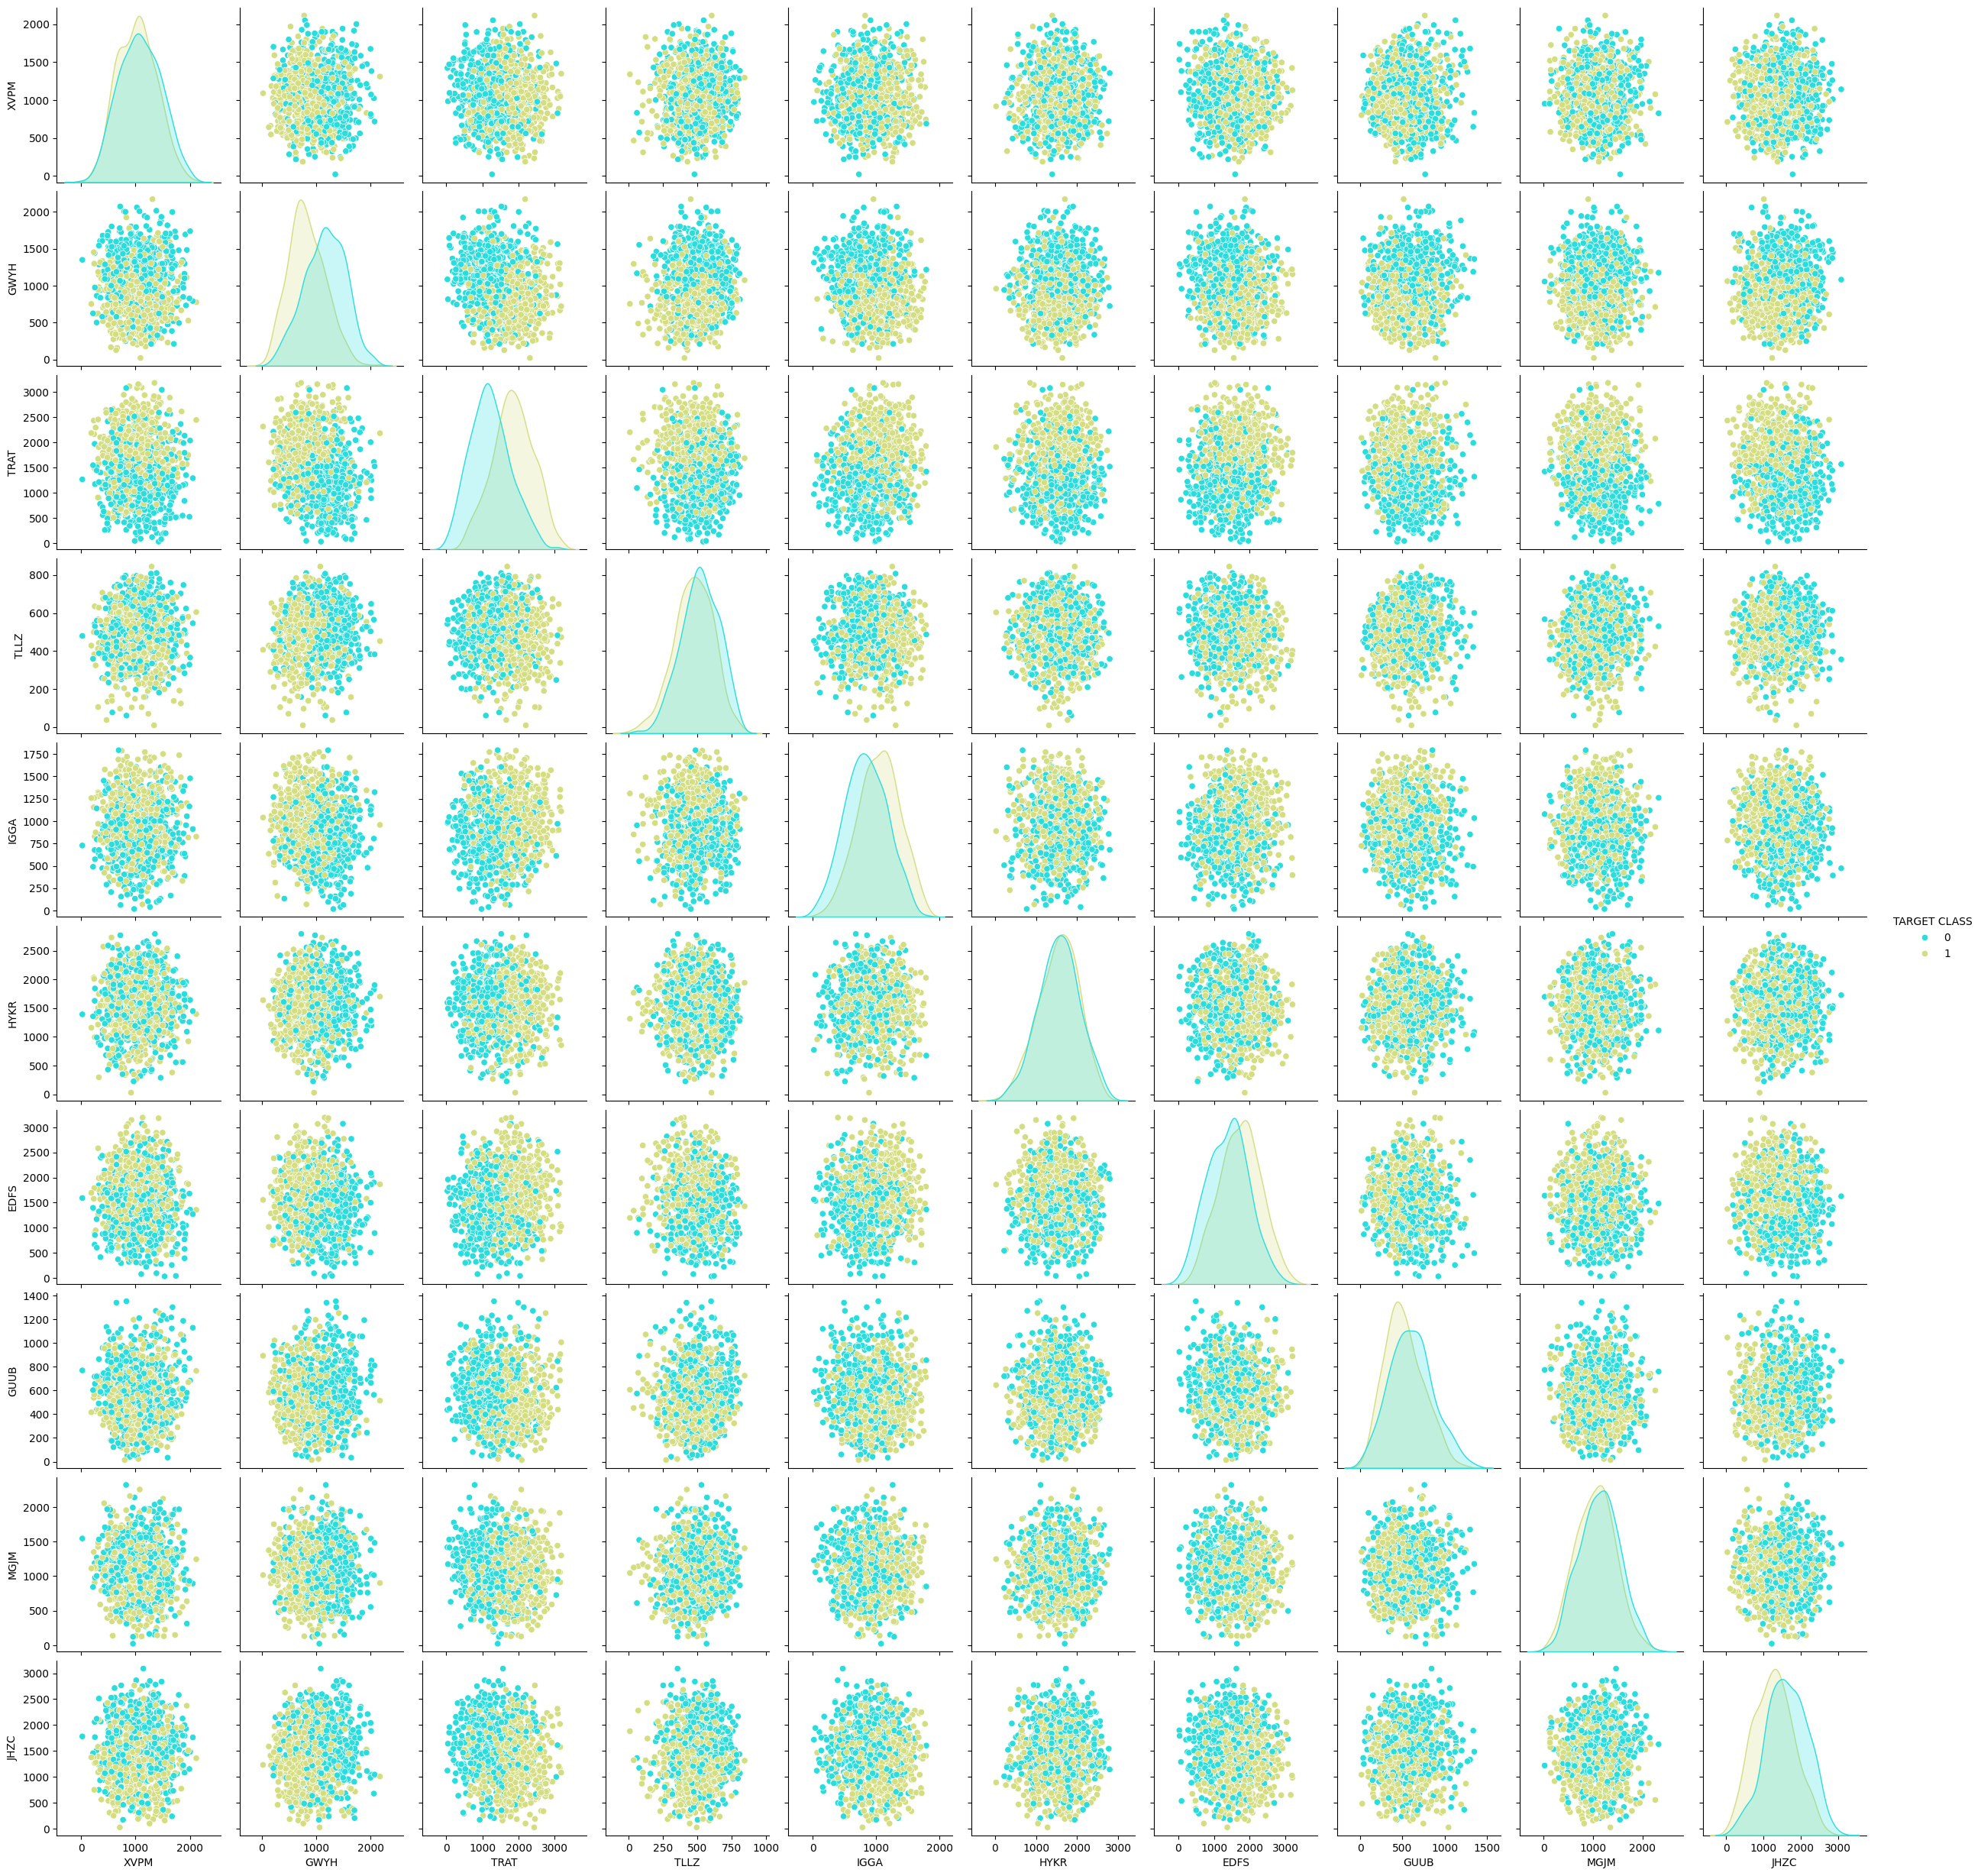

In [5]:

## EDA

sns.pairplot(df, hue = 'TARGET CLASS', palette= 'rainbow')

In [6]:

## Standardize the Variables

from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis= 1))

In [10]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[: -1])

In [11]:
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [12]:

## Train Test Split

from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'],
                                                   test_size= 0.30)

In [14]:

## Using KNN

from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:

## Predictions and Evaluations

In [18]:
pred= knn.predict(x_test)

In [19]:

from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print (confusion_matrix(y_test, pred))

[[107  32]
 [ 42 119]]


In [21]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       139
           1       0.79      0.74      0.76       161

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



In [22]:

### Choosing a K Value

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    pred_i= knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred_i))


error_rate

[np.float64(0.24666666666666667),
 np.float64(0.27),
 np.float64(0.23666666666666666),
 np.float64(0.24),
 np.float64(0.22666666666666666),
 np.float64(0.23),
 np.float64(0.19666666666666666),
 np.float64(0.21333333333333335),
 np.float64(0.2),
 np.float64(0.19666666666666666),
 np.float64(0.18666666666666668),
 np.float64(0.18),
 np.float64(0.18),
 np.float64(0.19666666666666666),
 np.float64(0.19),
 np.float64(0.18666666666666668),
 np.float64(0.18666666666666668),
 np.float64(0.19),
 np.float64(0.18666666666666668),
 np.float64(0.18333333333333332),
 np.float64(0.2),
 np.float64(0.19),
 np.float64(0.17666666666666667),
 np.float64(0.18),
 np.float64(0.18),
 np.float64(0.18666666666666668),
 np.float64(0.18666666666666668),
 np.float64(0.18666666666666668),
 np.float64(0.19333333333333333),
 np.float64(0.20333333333333334),
 np.float64(0.2),
 np.float64(0.19666666666666666),
 np.float64(0.19333333333333333),
 np.float64(0.18666666666666668),
 np.float64(0.19),
 np.float64(0.186666666

Text(0, 0.5, 'Error Rate')

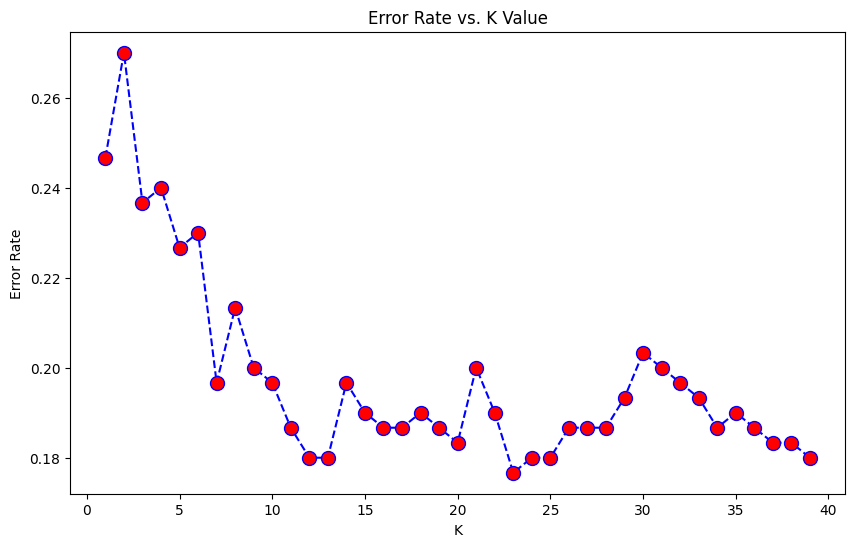

In [23]:


plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:


# NOW WITH K=30

knn = KNeighborsClassifier(n_neighbors = 30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=30


[[112  27]
 [ 34 127]]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       139
           1       0.82      0.79      0.81       161

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

